In [127]:
#schillinger special theory of harmony
#possible C3 C5 C7 in descending direction
from music21 import *
%load_ext music21.ipython21
%load_ext autoreload
%autoreload 2

The music21.ipython21 extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [233]:
# functions
def showNotes(notes):

    s = stream.Score(id='mainScore')
    stream.Score()
    part = stream.Part(id='part')
    part.timeSignature = meter.TimeSignature('8/1')
    tones = []
    for tone in notes:
        tone.octave = 3
        nota = note.Note(tone.nameWithOctave)
        #nota.pitch.octave = 3
        nota.duration.quarterLength = 4
        tones.append(nota)

    part.append(tones)
    s.insert(0, part)
    return s

def coeficients(coefs, scale):
    return sum(coefs)*len(scale)

def diatonic_cicles(scale, coef):
    my_scale = []
    a = scale.getTonic()
    my_scale.append(a)
    for i in range(7):
        a = scale.next(a, direction="descending",stepSize=coef-1)
        my_scale.append(a)
    return my_scale
    
def schillinger_type_I(fraction):
    
    major = fraction[0]
    minor = fraction[1]
    seq_len = major*minor
    return_arr = [] 
    count = 1
    for i in range(1, seq_len):
        if i > 0 and i % major == 0 or i % minor == 0:
            return_arr.append(count)
            count = 1
        else:
            count += 1
    return_arr.append(count)
    return return_arr

def diatonic_cicles_with_coeficients(scale, cycles, scale_length, coef):
    length = sum(coef)*scale_length
    count = 0
    sum_arr = []
    for i in range(length):
        coef_iterator = i%len(coef)
        cycles_iterator = coef_iterator % len(cycles)
        count += coef[coef_iterator]
        for c in range(coef[coef_iterator]):
            sum_arr.append(cycles[cycles_iterator])
        if count >= length: break
    
    my_scale = []
    a = scale.getTonic()
    my_scale.append(a)
    for i in sum_arr:
        a = scale.next(a, direction="descending",stepSize=i-1)
        my_scale.append(a)
    return my_scale


In [234]:
#tests
C = 5
testscale = scale.MajorScale('c')

In [235]:
seventh = diatonic_cicles(scale=testscale,coef=7)
thirds = diatonic_cicles(scale=testscale,coef=3)
fifts = diatonic_cicles(scale=testscale,coef=5)

#print(seventh)
#print(thirds)
#print(fifts)

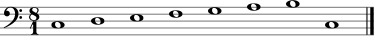

In [236]:
s = showNotes(seventh)
s.show()

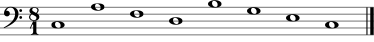

In [237]:
s = showNotes(thirds)
s.show()

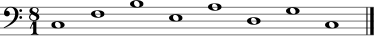

In [238]:
s = showNotes(fifts)
s.show()

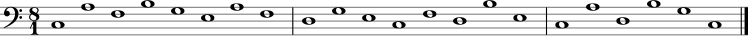

In [239]:
# coef
C3 = 3
C5 = 5
C7 = 7
scale_length = 7
cycles = [C3,C5]
coeficients = [2,1]
sc = diatonic_cicles_with_coeficients(testscale, cycles, scale_length, coeficients)
s = showNotes(sc)
s.show()

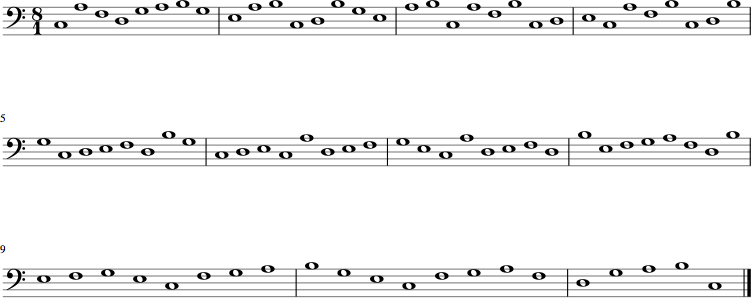

In [240]:
# coef
C3 = 3
C5 = 5
C7 = 7
scale_length = 7
cycles = [C3,C5,C7] 
coeficients = schillinger_type_I([4,3])#312213
sc = diatonic_cicles_with_coeficients(testscale, cycles, scale_length, coeficients)
s = showNotes(sc)
s.show()